# Кластеризация & метрики качества

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score
import pandas as pd
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('geo.xlsx')

In [3]:
X = np.array(data.iloc[:, 1:3])
y = data.iloc[:, 3]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# тяжелая визуализация на 100к+ строк
# sns.relplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue='comment_class', size='comment_class', kind='scatter', 
#             sizes=(50, 200), palette=sns.dark_palette('red', as_cmap=True), data=data, height=10)

### Кластеризация

In [6]:
dbscan = DBSCAN()

In [7]:
clusters = dbscan.fit_predict(X_scaled)

In [9]:
data['cluster'] = clusters
data

,Unnamed: 0,x,y,comment_class,cluster
0,0,37.612416,55.777454,-1,0
1,1,37.612416,55.777454,-1,0
2,2,37.603298,55.742108,-1,0
3,3,37.558526,55.728758,-1,0
4,4,37.566431,55.731794,-1,0
...,...,...,...,...,...
108801,108801,37.454528,55.792331,-1,0
108802,108802,37.384325,55.899068,-1,0
108803,108803,37.421066,55.848756,1,0
108804,108804,37.448509,55.793065,-1,0


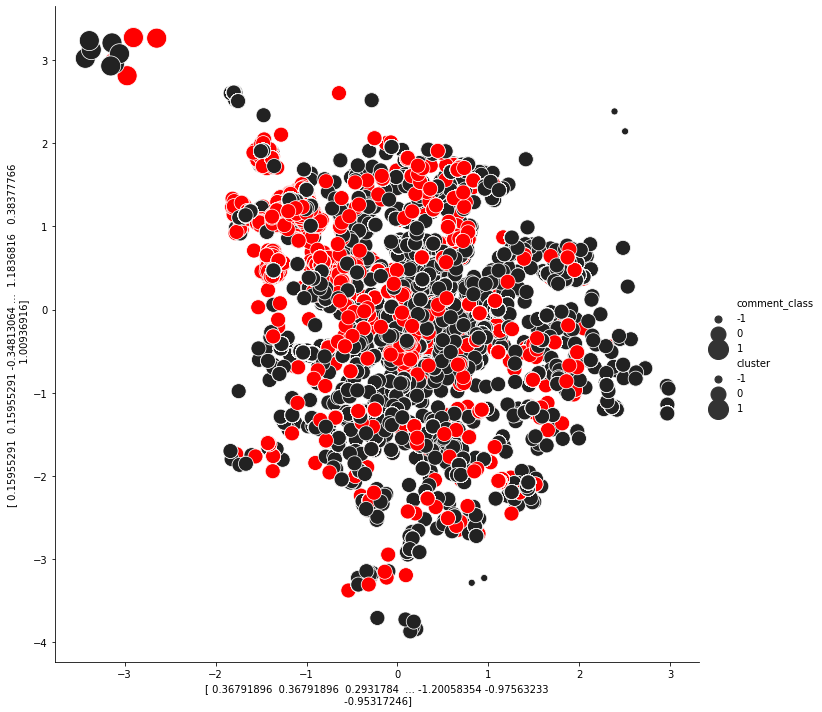

In [10]:
sns.relplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue='comment_class', size='cluster', kind='scatter', 
            sizes=(50, 400), palette=sns.dark_palette('red', as_cmap=True), data=data, height=10)

# Подбор количества кластеров для KMeans

KMeans минимизирует сумму квадратов расстояний объектов классов до их центроидов. В обученном классификаторе это значение находится в поле inertia_

Посчитаем значения inertia при разном количестве кластеров. Они объективно стремятся к нулю с ростом числа кластеров (предельный случай: каждый объект - кластер, расстояние = 0)

In [11]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

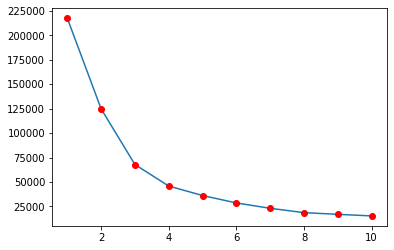

In [12]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Как подобрать оптимальное значение? Будем на каждом шаге смотреть изменение inertia, и в тот момент, когда оно резко замедлится (относительно предыдущего изменения) мы и остановимся

Для начала считаем сами изменения

$${inertia_{k+1}-inertia_{k}}$$

In [13]:
diff = np.diff(k_inertia)

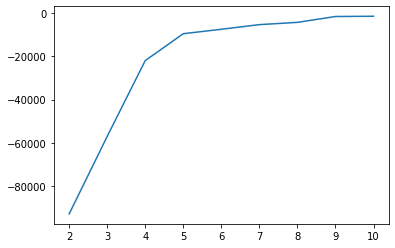

In [14]:
plt.plot(ks[1:], diff)

Теперь можно найти оптимальное число кластеров по этой формуле:

$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

In [15]:
diff_r = diff[1:] / diff[:-1]

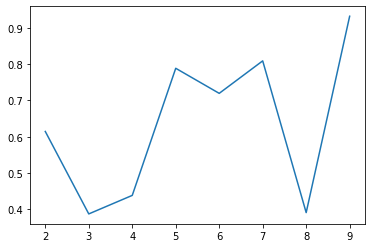

In [16]:
plt.plot(ks[1:-1], diff_r)

In [17]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3